In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-dark")
train_path = "/content/drive/MyDrive/Colab Notebooks/feature_tackle/cs-training.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/feature_tackle/cs-test.csv"

train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)

In [3]:
#look at the training data 
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [4]:
train_set.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#Data exploration for training_data


*   min(age) = 0，有outlier，使用median去replace
*   MonthlyIncome and NumberOfDependents
有很多null
*   NumberOfTimes90DaysLate and  NumberOfTime60-89DaysPastDueNotWorse and 
NumberOfTime30-59DaysPastDueNotWorse猜測可能有很高相關
*   NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines猜測可能有很高相關






In [5]:
#look at the test data
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

#Data exploration for test_data


*   MonthlyIncome and NumberOfDependents 
有遺失值
*   min(age) = 21




In [6]:
test_set.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


#Target SeriousDlqin2yrs

> 有不衡的資料，需要去處理






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


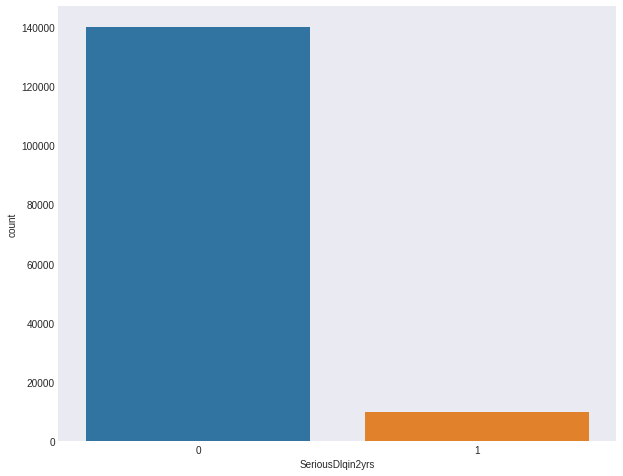

In [7]:
plt.figure(figsize=(10,8))
sns.countplot("SeriousDlqin2yrs",data = train_set)

#SeriousDlqin2yrs計算比例

*   SeriousDlqin2yrs計算比例 = 0，有93.31%
*   SeriousDlqin2yrs計算比例 = 1，有6.683%








In [8]:
total_class_0 = train_set.SeriousDlqin2yrs.value_counts()[0]
total_class_1 = train_set.SeriousDlqin2yrs.value_counts()[1]
print(f"ratio_class0 = {total_class_0/(total_class_0+total_class_1) * 100} %")
print(f"ratio_class1 = {total_class_1/(total_class_0+total_class_1) * 100} %")


ratio_class0 = 93.316 %
ratio_class1 = 6.683999999999999 %


In [9]:
#check 小於合法年紀
train_set.loc[train_set["age"] < 18]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


#age feature tackle

*   將age < 18用中位數去補值

#MonthlyIncome feature tackle


*   用0去補MonthlyIncome缺失值
*   將18 <= age < 60 與 age > 60 
分開用各自MonthlyIncome均數去補na值





In [10]:
train_set.loc[train_set["age"] == 0, "age"] = train_set["age"].median()

In [11]:
age_young = train_set.loc[(train_set["age"] >= 18) & 
       (train_set["age"] < 60)]
age_old = train_set.loc[train_set["age"] >= 60]

age_young_imput = age_young.MonthlyIncome.mean()
age_old_imput = age_old.MonthlyIncome.mean()


In [12]:
train_set["MonthlyIncome"] = np.absolute(train_set["MonthlyIncome"])

In [13]:
train_set["MonthlyIncome"] = train_set["MonthlyIncome"].fillna(0)

In [14]:
train_set.loc[((train_set["age"] >= 18) & (train_set["age"] < 60)) &
       (train_set["MonthlyIncome"] == 0),"MonthlyIncome"] = age_young_imput

train_set.loc[(train_set["age"] >= 60) & (train_set["MonthlyIncome"] == 0)
       ,"MonthlyIncome"] = age_old_imput

In [15]:
#check tackled data
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [16]:
train_set.loc[train_set["MonthlyIncome"] == 0]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


#Data NumberOfDependents feature tackle


> 用0去補NumberOfDependents缺失值



In [17]:
train_set["NumberOfDependents"] = np.absolute(train_set["NumberOfDependents"])
train_set["NumberOfDependents"] = train_set["NumberOfDependents"].fillna(0)


In [18]:
train_set["NumberOfDependents"].value_counts()

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

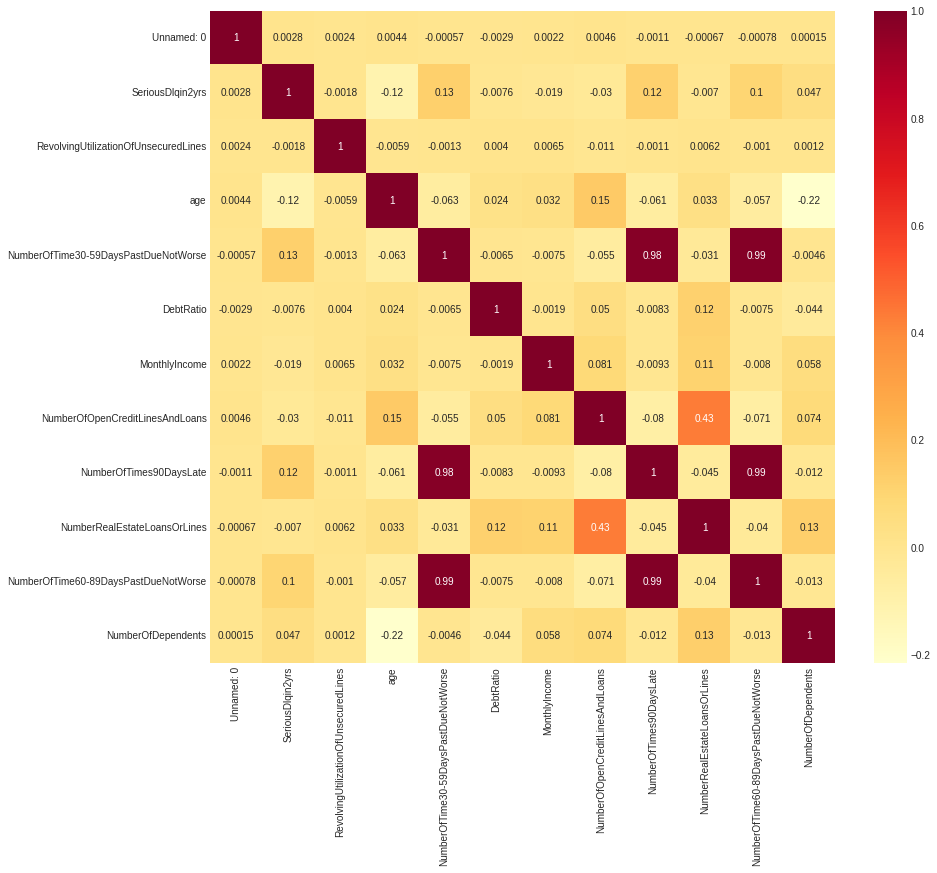

In [19]:
#plot covariance matrix，觀察target與feature之間關係
cor_matrix = train_set.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cor_matrix, annot=True, cmap="YlOrRd" , fmt=".2g")

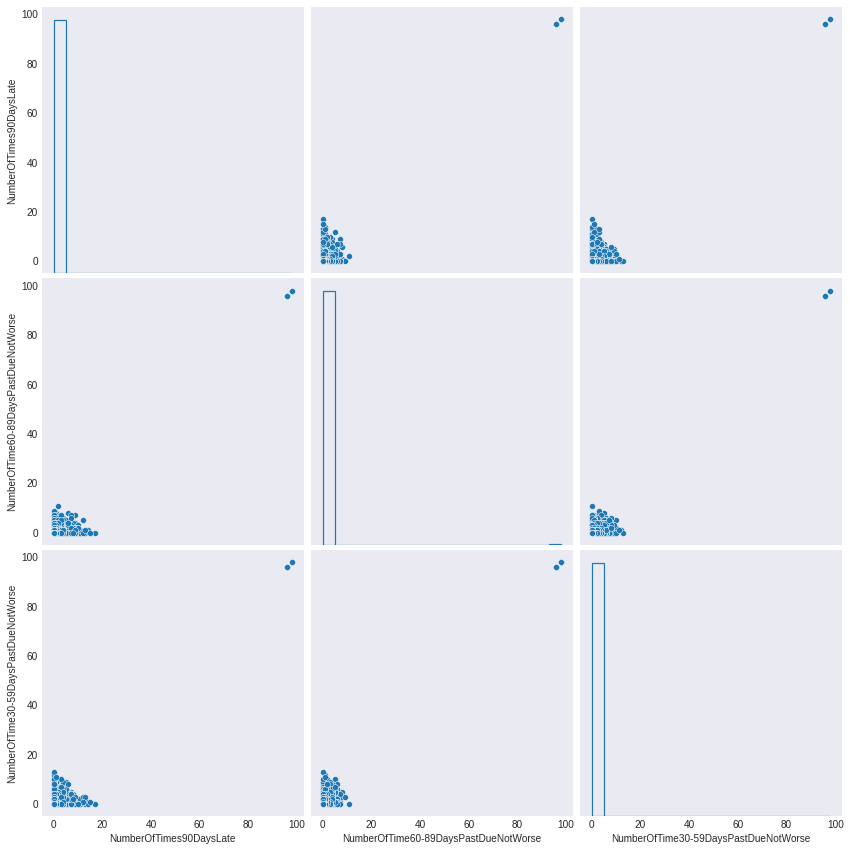

In [36]:
#pairplot NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse and NumberOfTime30-59DaysPastDueNotWorse
sns.pairplot(x_vars = ["NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse","NumberOfTime30-59DaysPastDueNotWorse"],
      y_vars = ["NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse","NumberOfTime30-59DaysPastDueNotWorse"],
      data = train_set,diag_kws=dict(fill=False),height=4)



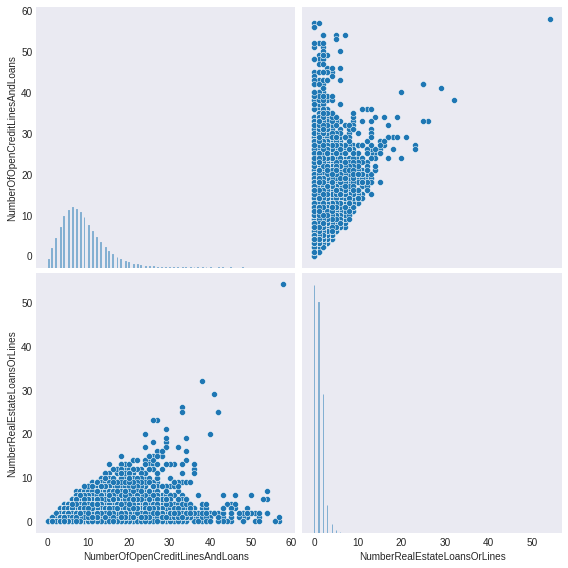

In [37]:
#pairplot NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines
sns.pairplot(x_vars = ["NumberOfOpenCreditLinesAndLoans","NumberRealEstateLoansOrLines"],
      y_vars = ["NumberOfOpenCreditLinesAndLoans","NumberRealEstateLoansOrLines"],
      data = train_set,diag_kws=dict(fill=False),height=4)



#NumberOfTimes90DaysLate，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTime30-59DaysPastDueNotWorse feature tackle


1.   因為三種feature相關性太高，避免高度線性重合

2.   採取一.丟掉其中兩個feature，
      二.合併三個變數


#NumberOfOpenCreditLinesAndLoans，NumberRealEstateLoansOrLines feature tackle


> 使用相同處理方法













In [38]:
train_set["CombinedDefaulted"] = (train_set["NumberOfTimes90DaysLate"] + 
                  train_set["NumberOfTime60-89DaysPastDueNotWorse"] +
                  train_set["NumberOfTime30-59DaysPastDueNotWorse"])


In [39]:
train_set.loc[train_set["CombinedDefaulted"] >= 1, "CombinedDefaulted"] = 1

In [40]:
train_set["CombinedCreditLoans"] = (train_set["NumberOfOpenCreditLinesAndLoans"] + 
                   train_set["NumberRealEstateLoansOrLines"])

In [41]:
train_set.loc[train_set["CombinedCreditLoans"] <=5 ,"CombinedCreditLoans"] = 0

train_set.loc[train_set["CombinedCreditLoans"] > 5, "CombinedCreditLoans"] = 1

In [42]:
train_set.CombinedCreditLoans.value_counts()

1    111375
0     38625
Name: CombinedCreditLoans, dtype: int64



> 創造新的feature WithDependents，透過NumberOfDependents feature

> 創造新的feature MonthlyDebtPayments，透過
DebtRatio = Monthly debt payments / monthly gross income




In [43]:
train_set["WithDependents"] = train_set["NumberOfDependents"]

train_set.loc[train_set["WithDependents"] >= 1, "WithDependents"] = 1

In [44]:
train_set.WithDependents.value_counts()

0.0    90826
1.0    59174
Name: WithDependents, dtype: int64

In [45]:
train_set["MonthlyDebtPayments"] = train_set["DebtRatio"] * train_set["MonthlyIncome"]

train_set["MonthlyDebtPayments"] = np.absolute(train_set["MonthlyDebtPayments"])


In [46]:
#using age_map(temporary age_dataframe) for old and young dataframe
train_set["age_map"] = train_set["age"]

train_set.loc[(train_set["age"] >= 18) & (train_set["age"] < 60) , "age_map"] = 1

train_set.loc[(train_set["age"] >= 60), "age_map"] = 0

In [47]:
train_set["age_map"].value_counts()

1    101682
0     48318
Name: age_map, dtype: int64

In [48]:
#replace 0 with young
#replace 1 with old
train_set["age_map"] = train_set["age_map"].replace(to_replace=0,value="young")

train_set["age_map"] = train_set["age_map"].replace(to_replace=1,value="old")

In [49]:
train_set["age_map"].value_counts()

old      101682
young     48318
Name: age_map, dtype: int64

In [50]:
train_set = pd.concat([train_set, pd.get_dummies(train_set.age_map,prefix="is")],axis = 1)


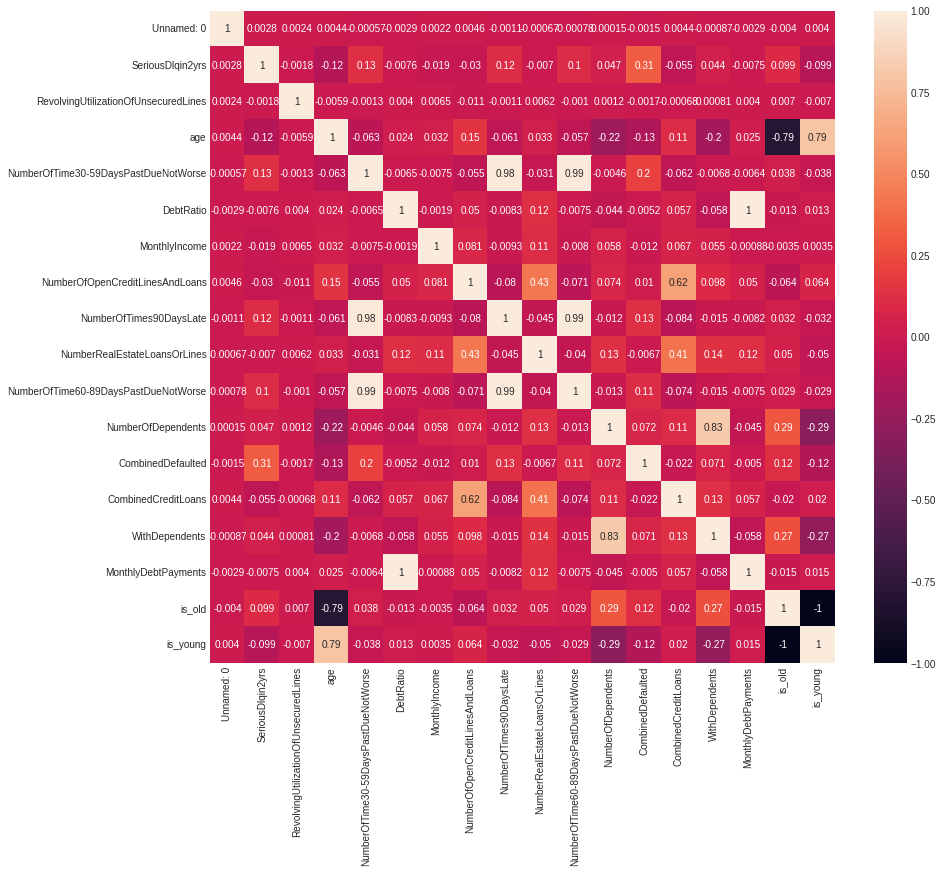

In [51]:
#plot tackled traing_data，拿掉feature相關係數高的，避免multicollinearity
cor_matrix = train_set.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cor_matrix, annot=True, fmt=".2g")

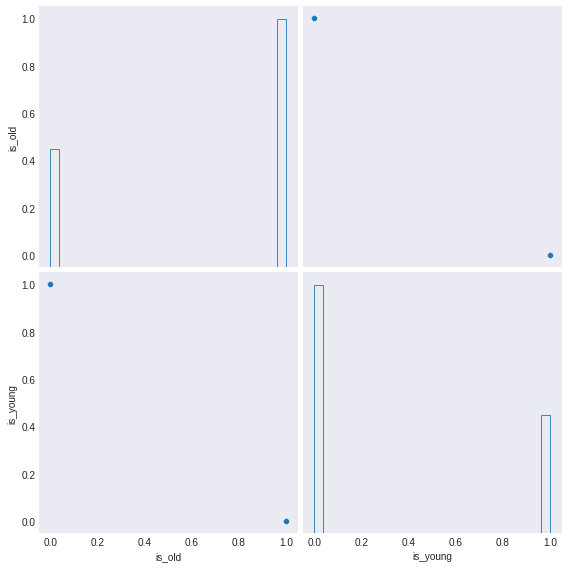

In [52]:
#check is_old,is_young with pairplot
sns.pairplot(x_vars = ["is_old","is_young"],
      y_vars = ["is_old","is_young"],
      data = train_set,diag_kws=dict(fill=False),height=4)



In [53]:
print(train_set["is_old"].value_counts())
print(train_set["is_young"].value_counts())

1    101682
0     48318
Name: is_old, dtype: int64
0    101682
1     48318
Name: is_young, dtype: int64


#結論

*   針對長期有違約風險資訊可用CombinedDefaulted feature 代表，剩下
NumberOfTimes90DaysLate，NumberOfTime60-89DaysPastDueNotWorse則可以刪除

*   NumberOfTime30-59DaysPastDueNotWorse留下作為短期或中期有違約風險重要feature

*   由於is_old，is_young是二元變數，age包含更多資訊量，則將其刪除，且這兩變數若同時放會發生虛擬變數陷阱
*   WithDependents是二元變數，將其刪除

*   CombinedCreditLoans能夠包含其他兩個feature，將其他刪掉
*   MonthlyDebtPayments將其刪除





In [54]:
train_set.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans',
       'WithDependents', 'MonthlyDebtPayments', 'age_map', 'is_old',
       'is_young'],
      dtype='object')

In [55]:
train_set.drop(["Unnamed: 0", "NumberOfOpenCreditLinesAndLoans",
        "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines",
        "NumberOfTime60-89DaysPastDueNotWorse", "WithDependents",
        "age_map", "is_old", "is_young", "MonthlyDebtPayments"],
        axis = 1, inplace = True)

In [56]:
train_set.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

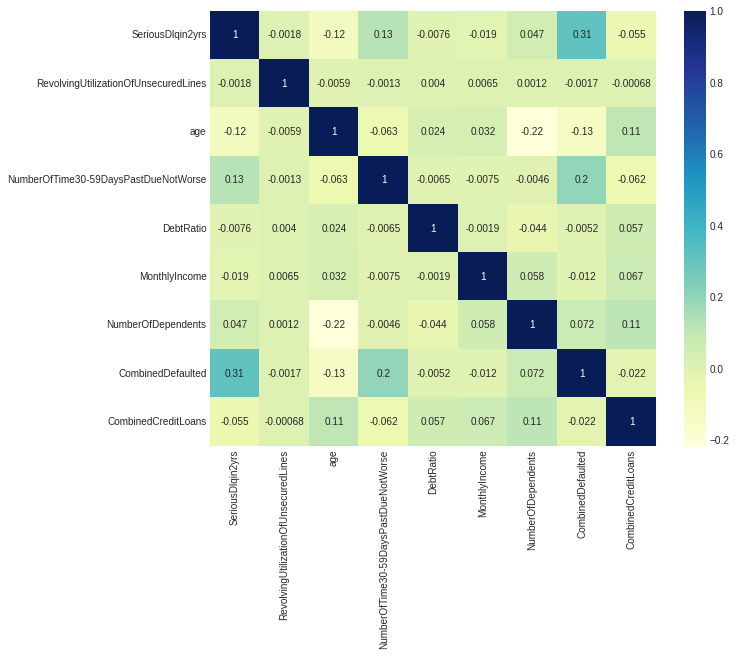

In [57]:
#plot heatmap with filtered final features
cor_matrix = train_set.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True,cmap="YlGnBu", fmt = ".2g")

#Clean test_data

*   將traingdata處理方式一樣對testdata進行清洗
*   將清洗方式寫成函數以便清洗



In [58]:
def clean_data(dataset) :
  #tackle age
  dataset.loc[dataset["age"] <= 18, "age"] = dataset.age.median()
    
  age_young = dataset.loc[(dataset["age"] >= 18) & (dataset["age"] < 60)]
  age_old = dataset.loc[(dataset["age"] >= 60)]

  age_young_impute = age_young.MonthlyIncome.mean()
  age_old_impute = age_old.MonthlyIncome.mean()

  #tackle MonthlyIncome
  dataset["MonthlyIncome"] = np.absolute(dataset["MonthlyIncome"])
  dataset["MonthlyIncome"] = dataset["MonthlyIncome"].fillna(0)
  

  dataset.loc[((dataset["age"] >= 18) & (dataset["age"] < 60)) & 
        (dataset["MonthlyIncome"] == 0),"MonthlyIncome"] = age_young_impute

  dataset.loc[(dataset["age"] >= 60) & (dataset["MonthlyIncome"] == 0), "MonthlyIncome"] = age_old_impute

  #tackle NumberOfDependents
  dataset["NumberOfDependents"] = np.absolute(dataset["NumberOfDependents"])
  dataset["NumberOfDependents"] = dataset["NumberOfDependents"].fillna(0)

  #Combine NumberOfTimes90DaysLate NumberOfTime60-89DaysPastDueNotWorse NumberOfTime30-59DaysPastDueNotWorse
  dataset["CombinedDefaulted"] = ((dataset["NumberOfTimes90DaysLate"] + dataset["NumberOfTime60-89DaysPastDueNotWorse"]) + 
                   dataset["NumberOfTime30-59DaysPastDueNotWorse"])

  dataset.loc[(dataset["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1
  
  #Combine NumberOfOpenCreditLinesAndLoans NumberRealEstateLoansOrLines
  dataset["CombinedCreditLoans"] = (dataset["NumberOfOpenCreditLinesAndLoans"] + 
                    dataset["NumberRealEstateLoansOrLines"])
  
  dataset.loc[(dataset["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0

  dataset.loc[(dataset["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

  dataset.drop(["Unnamed: 0","NumberOfOpenCreditLinesAndLoans",
         "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines",
         "NumberOfTime60-89DaysPastDueNotWorse"], axis=1, inplace=True)
    

    

In [59]:
clean_data(test_set)

In [60]:
test_set.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

In [61]:
train_set.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

In [62]:
train_set.shape, test_set.shape

((150000, 9), (101503, 9))

In [63]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         101503 non-null  float64
 6   NumberOfDependents                    101503 non-null  float64
 7   CombinedDefaulted                     101503 non-null  int64  
 8   CombinedCreditLoans                   101503 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 7.0 MB


In [64]:
tackle_train_path = train_path.split("/")
tackle_train_path[-1] = "tackle-cs-training.csv"

tackle_test_path = test_path.split("/")
tackle_test_path[-1] = "tackle-cs-test.csv"

tackle_train_path = "/".join(tackle_train_path)
tackle_test_path = "/".join(tackle_test_path)

In [65]:
train_set.to_csv(tackle_train_path, encoding="utf-8",index = True, sep=",")
test_set.to_csv(tackle_test_path, encoding="utf-8", index= True, sep=",")